# Case study on Pre-processing

# Do the following on titanic dataset.
1. Load the dataset into python environment
2. Make ‘PassengerId’ as the index column
3. Check the basic details of the dataset
4. Fill in all the missing values present in all the columns in the dataset
5. Check and handle outliers in at least 3 columns in the dataset
6. Do min max scaling on the feature set (Take ‘Survived’ as target)


# 1. Load the dataset into python environment

In [188]:
#Import the main libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Read the csv to a variable
titanic_data=pd.read_csv("titanic_dataset.csv")
#Display the variable and see if the data is visible as rows and columns
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


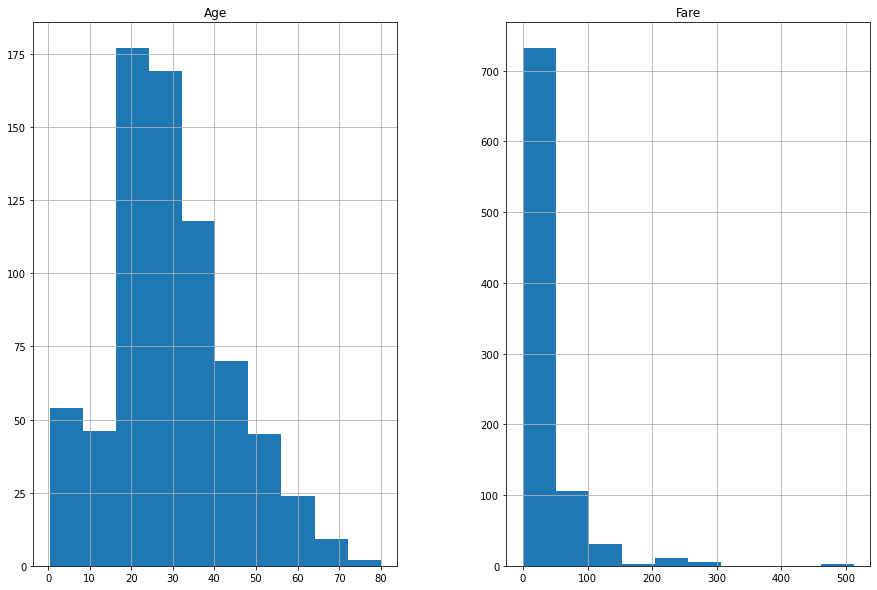

In [189]:
#Check the visualizations for float datatype columns
freqgraph = titanic_data.select_dtypes(include=['float64'])
freqgraph.hist(figsize=(15,10))
plt.show()

C:\Users\MY BOOK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

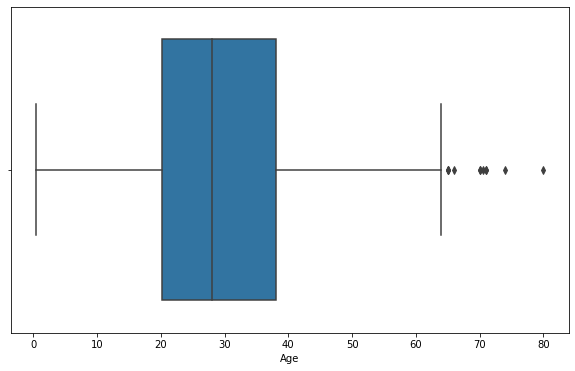

In [190]:
fig , ax = plt.subplots(figsize=(10,6))
sns.boxplot(titanic_data['Age'])

# 2. Make ‘PassengerId’ as the index column

In [191]:
#Use set_index function to assign index to PassengerIdcolumn
titanic_data = titanic_data.set_index('PassengerId')

In [192]:
#Check the dataset after assigning the index
titanic_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


# 3. Check the basic details of the dataset

In [193]:
#use info keyword for checking the basic details
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [194]:
# Check the number of null values in each column
titanic_data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [195]:
# Fund the percentage of missing values in each column 
titanic_data.isnull().mean() * 100

Survived     0.000000
Pclass       0.000000
Name         0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64

# Inferences
 1. There are missing values in the Age , Cabin and Embarked Columns.
 2. 'Age' is a numeric column and around 90% of the data is entered and 20% is null. So we can use interpolation method to fill      the data.
 3. Around 77% of the 'Cabin' column is null. So, this column does not serve any purpose in the analysis. It's better to drop
     it
 4. The "Embarked" column has only 2 missing values. We can develop the algorithm to find the missing values.

# 4. Fill in all the missing values present in all the columns in the dataset

# 4.1 - Filling missing values for 'Age'

C:\Users\MY BOOK\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

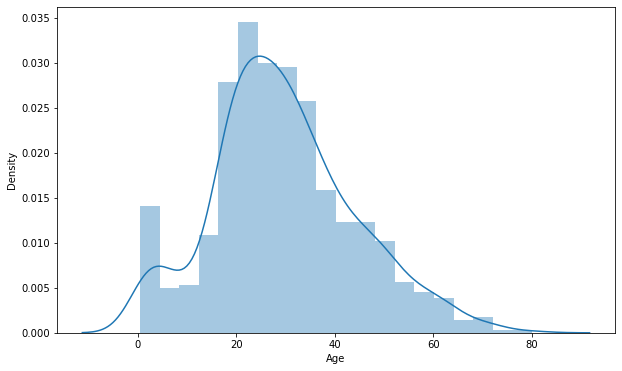

In [196]:
# First let us find the strategy for filling the 'Age' column.
# Plot for 'Age'
fig , ax = plt.subplots(figsize=(10,6))
sns.distplot(titanic_data['Age'])

In [197]:
# We could seethat 'Age' has a slight Right skew . So we can fill the missing values with median as shown below
titanic_data['Age']=titanic_data['Age'].fillna(titanic_data['Age'].median())

C:\Users\MY BOOK\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

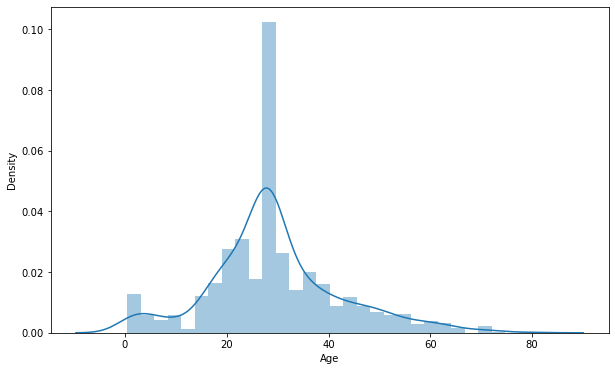

In [11]:
# Plot for "Age" after filling the missing values with 'median'
fig , ax = plt.subplots(figsize=(10,6))
sns.distplot(titanic_data['Age'])

In [198]:
#Checking the dataset to see if it still has any missing values inthe "Age" column
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


# 4.2 - Filling missing values for 'Cabin'

In [199]:
# Fund the percentage of missing values in each column 
titanic_data.isnull().mean() * 100

Survived     0.000000
Pclass       0.000000
Name         0.000000
Sex          0.000000
Age          0.000000
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64

In [200]:
# Since 77% percentage of 'Cabin' column is null, we cannot design an algorithm to predict the 
# missing values with proper precision. So we'll drop the column

titanic_data = titanic_data.drop(labels = ["Cabin"], axis=1)

In [201]:
# Check if 'Cabin' column is still there or not.
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 76.6+ KB


# 4.3 Filling missing data for "Embarked"

In [202]:
# Finding the rows which have missing values for embarking points 
missing_embark = titanic_data[titanic_data['Embarked'].isnull()]

In [203]:
missing_embark

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [204]:
# Let's see if anyone else is travelling with same ticket number
titanic_data[(titanic_data['Embarked'].notnull()) & 
              (titanic_data['Ticket'] == '113572')  ]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,


In [205]:
# Let's see if anyone else is having similar last name 
titanic_data[(titanic_data['Embarked'].notnull()) &
             (titanic_data['Name'].str.startswith('Ica') | titanic_data['Name'].str.startswith('Ston'))]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,


In [ ]:
# Since we couldnot find out anyone else with a similar Ticket number, cabin number or Last name, it's better to
# ingest the embarkation point with the value which is most frequent 

<AxesSubplot:ylabel='Embark'>

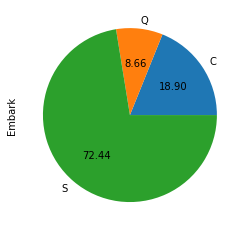

In [206]:
# Pie plot for embark to find which embarkation point has most frequency
titanic_data.groupby('Embarked').size().plot(kind='pie', autopct='%.2f',ylabel="Embark")

In [207]:
# We can see that more than 72% have embark point as "S" (most likely , southampton), so we'll ingest the
#  value 'S' for the 2 rows where embark point is missing
titanic_data['Embarked'] = titanic_data['Embarked'].fillna('S') 

In [208]:
# Check the dataset to see if there are any more missing values in any of the columns
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 76.6+ KB


# 5. Check and handle outliers in at least 3 columns in the dataset

# 5.1 - Handling outliers for 'Fare'

In [213]:
# Calculate quartile values for 'Fare' using 25 , 50 and 75 percentilevalues
Q1_Fare = np.percentile(titanic_data['Fare'],25,interpolation='midpoint')
Q2_Fare = np.percentile(titanic_data['Fare'],50,interpolation='midpoint')
Q3_Fare = np.percentile(titanic_data['Fare'],75,interpolation='midpoint')


In [214]:
Q1_Fare

7.9104

In [215]:
Q2_Fare

14.4542

In [216]:
Q3_Fare

31.0

In [217]:
IQR_Fare = Q3_Fare - Q1_Fare

In [218]:
Low_Lim_Fare = Q1_Fare - 1.5*IQR_Fare
High_Lim_Fare = Q3_Fare + 1.5*IQR_Fare

In [219]:
Low_Lim_Fare

-26.724

In [220]:
High_Lim_Fare

65.6344

In [221]:
# Find all outlier values fares 
outlier_fare_using_quartile = []
for x in titanic_data['Fare']:
    if ( x < Low_Lim_Fare ) or ( x > High_Lim_Fare ):
        outlier_fare_using_quartile.append(x)
    

In [222]:
outlier_fare_using_quartile

[71.2833,
 263.0,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 263.0,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 69.55,
 69.55,
 146.5208,
 69.55,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 153.4625,
 135.6333,
 77.9583,
 78.85,
 91.0792,
 151.55,
 247.5208,
 151.55,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 69.55,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 263.0,
 75.25,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 263.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 79.2,
 78.2667,
 153.4625,
 77.9583,
 69.3,
 76.7292,
 73.5,
 113.275,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 71.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 69.55,
 120.0,
 93.5,
 80.0,
 83.1583,
 6

# We could see that there are a lot of outliers for the "fare" column as seen above 

# We cannot delete all the ouliers detected from using the quartile approach since it'll lead to losing a major chunk of data from the 'Fare' column altogether.

# The distribution for 'fare' is not normal and heavily right skewed as shown below.

C:\Users\MY BOOK\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

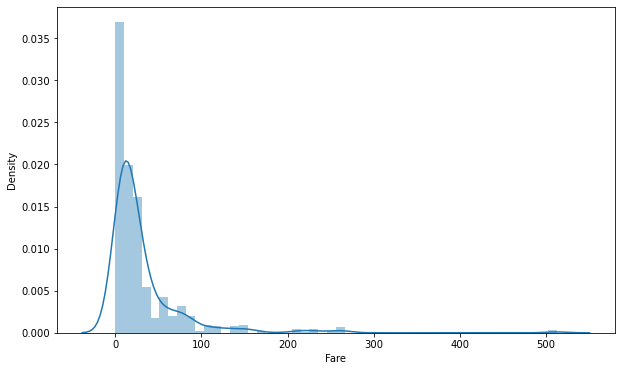

In [36]:
fig , ax = plt.subplots(figsize=(10,6))
sns.distplot(titanic_data['Fare'])

# So we'll use a different approach to detect the outliers by using 30 percentile increments instead of quartiles

In [225]:
Q1_Fare = np.percentile(titanic_data['Fare'],30,interpolation='midpoint')
Q2_Fare = np.percentile(titanic_data['Fare'],60,interpolation='midpoint')
Q3_Fare = np.percentile(titanic_data['Fare'],90,interpolation='midpoint')
IQR_Fare = Q3_Fare - Q1_Fare
Low_Lim_Fare = Q1_Fare - 1.5*IQR_Fare
High_Lim_Fare = Q3_Fare + 1.5*IQR_Fare

In [226]:
Low_Lim_Fare

-96.81245

In [227]:
High_Lim_Fare

182.82074999999998

Text(0.5, 1.0, 'fare - box plot')

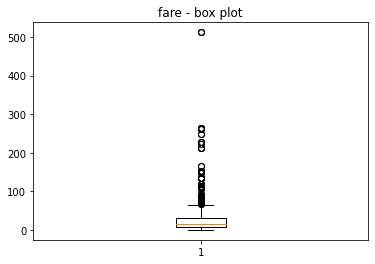

In [43]:
# Let's see the simple box plot for fare.
plt.boxplot(titanic_data['Fare'])
plt.title('fare - box plot')

# From the box plot, it is clear that there are outliers in the higher fare whereas there are no outliers in the low fare range

In [230]:
# Let's find out which are the outlier fare indexes
indi_outlier_Fare = []
indi_outlier_Fare = titanic_data['Fare'] > High_Lim_Fare
titanic_data.loc[indi_outlier_Fare].index

Int64Index([ 28,  89, 119, 259, 300, 312, 342, 378, 381, 439, 528, 558, 680,
            690, 701, 717, 731, 738, 743, 780],
           dtype='int64', name='PassengerId')

In [231]:
# We can notice that there is comparitively less outlier values as compared to using quartile approach.
# Let's drop the indexes having outlier values for 'Fare' 
titanic_data.drop([ 28,  89, 119, 259, 300, 312, 342, 378, 381, 439, 528, 558, 680,
            690, 701, 717, 731, 738, 743, 780],inplace=True)

# 5.2 - Handling outliers for 'Parch'

C:\Users\MY BOOK\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Parch', ylabel='Density'>

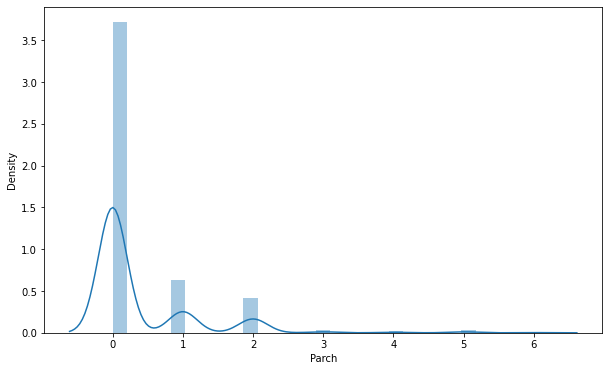

In [232]:
# Checking the distance plot for 'Parch'
fig , ax = plt.subplots(figsize=(10,6))
sns.distplot(titanic_data['Parch'])

In [233]:
# So we'll use a different approach to detect the outliers by using 27 percentile increments instead of quartiles
Q1_Parch = np.percentile(titanic_data['Parch'],27,interpolation='midpoint')
Q2_Parch = np.percentile(titanic_data['Parch'],54,interpolation='midpoint')
Q3_Parch = np.percentile(titanic_data['Parch'],81,interpolation='midpoint')
IQR_Parch = Q3_Parch - Q1_Parch
Low_Lim_Parch = Q1_Parch - 1.5*IQR_Parch
High_Lim_Parch = Q3_Parch + 1.5*IQR_Parch

In [234]:
IQR_Parch

1.0

In [235]:
Low_Lim_Parch

-1.5

In [236]:
High_Lim_Parch

2.5

In [237]:
indi_outlier_parch = []
indi_outlier_Parch = titanic_data['Parch'] > High_Lim_Parch
titanic_data.loc[indi_outlier_Parch].index

Int64Index([14, 26, 87, 168, 361, 438, 568, 611, 639, 679, 737, 775, 859, 886], dtype='int64', name='PassengerId')

In [238]:
titanic_data.drop([ 14, 26, 87, 168, 361, 438, 568, 611, 639, 679, 737, 775, 859, 886],inplace=True)

# 5.3 - Handling outliers for 'Age'

In [ ]:
# Let's check the basic statistics on the 'Age' column

In [254]:
titanic_data['Age'].describe()

count    857.000000
mean      29.200898
std       13.047273
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

# We can see that that people of all ages are there in Titanic with the minimum being 0.42 and maximum being 80.

# The mean and median age are around 29 and 28 respectively which concludes that most of the passengers are among the youth.

# However, we should not conclude that anyone who's an infant or a senior citizen as an outlier since they can also board the ship in all possibilities.

# Therefore, we are not considering any data in the 'age'column as an outlier and maintaining the data as it is.

In [256]:
# Checking the dataset after handling all outliers
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 857 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  857 non-null    int64  
 1   Pclass    857 non-null    int64  
 2   Name      857 non-null    object 
 3   Sex       857 non-null    object 
 4   Age       857 non-null    float64
 5   SibSp     857 non-null    int64  
 6   Parch     857 non-null    int64  
 7   Ticket    857 non-null    object 
 8   Fare      857 non-null    float64
 9   Embarked  857 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 73.6+ KB


# 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [257]:
# Let's copy all the numerical columns to a new dataset. These will serve as the features 
titanic_num_data= titanic_data[['Pclass','Age','SibSp','Parch','Fare']].copy()

from sklearn import preprocessing
min_max_titanic = preprocessing.MinMaxScaler(feature_range=(0,1))
min_max_titanic_data = min_max_titanic.fit_transform(titanic_num_data)

In [258]:
# Let's use the same column names & index as of titanic_num_data for the min_max scaled dataset

mm_scale_titatic_Data = pd.DataFrame(min_max_titanic_data, index=titanic_num_data.index, columns=titanic_num_data.columns)

In [259]:
# Let's check the basic details of the min max scaled dataset
mm_scale_titatic_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 857 entries, 1 to 891
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  857 non-null    float64
 1   Age     857 non-null    float64
 2   SibSp   857 non-null    float64
 3   Parch   857 non-null    float64
 4   Fare    857 non-null    float64
dtypes: float64(5)
memory usage: 40.2 KB


In [260]:
# Let's check the basic stats details of the min max scaled dataset
mm_scale_titatic_Data.describe()

,Pclass,Age,SibSp,Parch,Fare
count,857.000000,857.000000,857.000000,857.000000,857.000000
mean,0.665111,0.361660,0.064177,0.152275,0.160601
std,0.412122,0.163952,0.138448,0.310219,0.179366
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.271174,0.000000,0.000000,0.047892
50%,1.000000,0.346569,0.000000,0.000000,0.081379
75%,1.000000,0.434531,0.125000,0.000000,0.180146
max,1.000000,1.000000,1.000000,1.000000,1.000000


# Let's use the mm_scale_titatic_Data having min max scaling for predicting the values for "Survived" column using Linear regression model

In [261]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
x = mm_scale_titatic_Data
y = titanic_data['Survived']

# Here we are using 95% of the whole data for training and the rest 5% for testing
X_train, X_test , y_train , y_test = train_test_split ( x, y , random_state=42, test_size = 0.05)
lr = linear_model.LinearRegression()
model = lr.fit(X_train,y_train)
predictions_linear = model.predict(X_test)

# We'll round up the prediction value to get a whole number instead of a floating point
predictions_linear_rounded = np.round_(predictions_linear)
MSE_Linear_Regression = mean_squared_error(y_test, predictions_linear_rounded)
RSV_Linear_Regression = r2_score(y_test, predictions_linear_rounded)

In [262]:
MSE_Linear_Regression

0.3023255813953488

In [263]:
RSV_Linear_Regression

-0.2099567099567099

In [264]:
predictions_linear_rounded

array([1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0.])

# We could notice that the MSE and RSV values for linear model is 0.3 and -0.2 respectively.

# However, since "Survived" is a classification column ( having values 0 which points to "no" and 1 which points to "Yes"),we can try if Logistic regression yields better results on predicting the value for "Survived" column.

In [266]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions_log = logmodel.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions_log))

              precision    recall  f1-score   support

           0       0.67      0.91      0.77        22
           1       0.85      0.52      0.65        21

    accuracy                           0.72        43
   macro avg       0.76      0.72      0.71        43
weighted avg       0.75      0.72      0.71        43



In [267]:
# Let's check the confusion matrix to see the accuracy of the prediction
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions_log)

array([[20,  2],
       [10, 11]], dtype=int64)

Confusin matrix results for logistic regression 
True positive: 20 (We predicted a positive result and it was positive)
True negative: 11 (We predicted a negative result and it was negative)
False positive: 2 (We predicted a positive result and it was negative)
False negative: 10 (We predicted a negative result and it was positive)

In [268]:
# Let's find out the MSE and RSV for Logistic regression model
MSE_Log_Regression = mean_squared_error(y_test, predictions_log)
RSV_Log_Regression = r2_score(y_test, predictions_log)

In [269]:
MSE_Log_Regression

0.27906976744186046

In [271]:
RSV_Log_Regression

-0.11688311688311703

# Here we can see that mean square error is slightly lesser for Logistic regression model and hence we can conclude that it's a slightly better model for training. 

# Submitted by Viswaraj Chandran